In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
# Загрузка датасета MNIST:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Нормализация данных:
train_images = train_images / 255.0
test_images = test_images / 255.0
# Преобразование меток в one-hot encoding:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Создание простой полносвязной модели:
model1 = Sequential([Flatten(input_shape=(28, 28)), Dense(128, activation='relu'), Dense(10, activation='softmax')])
# Компиляция модели:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Обучение модели:
model1.fit(train_images, train_labels, epochs=5)
# Проверка точности модели на обычных данных:
test_loss, test_acc = model1.evaluate(test_images, test_labels)
print(f'Test accuracy on clean images: {test_acc}')
# Сохранение модели:
model1.save('mnist_model_fully_connected.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8781 - loss: 0.4293
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9641 - loss: 0.1207
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9779 - loss: 0.0772
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9821 - loss: 0.0601
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9867 - loss: 0.0440
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9739 - loss: 0.0853


Test accuracy on clean images: 0.9764999747276306


In [4]:

# Создание модели свёрточной нейронной сети:
model2 = Sequential([Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), MaxPooling2D((2, 2)), Flatten(), Dense(128, activation='relu'),
                     Dense(10, activation='softmax')])
# Компиляция модели:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Обучение модели:
model2.fit(train_images, train_labels, epochs=5)
# Проверка точности модели на обычных данных:
test_loss, test_acc = model2.evaluate(test_images, test_labels)
print(f'Test accuracy on clean images: {test_acc}')
# Сохранение модели:
model2.save('mnist_model_сonvolutional.h5')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9093 - loss: 0.2984
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9848 - loss: 0.0500
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 20ms/step - accuracy: 0.9906 - loss: 0.0296
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.9948 - loss: 0.0173
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9956 - loss: 0.0133
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9835 - loss: 0.0522


Test accuracy on clean images: 0.9871000051498413


In [6]:
import numpy as np
# Функция для реализации FGSM атаки:
def fgsm_attack(image, epsilon, gradient):
  # Применение знака градиента к изображению:
  perturbed_image = image + epsilon * np.sign(gradient)
  # Обрезка значений, чтобы они оставались в пределах [0,1]:
  perturbed_image = np.clip(perturbed_image, 0, 1)
  return perturbed_image
# Вычисление градиента:
def generate_adversarial_example(model, images, labels, epsilon):
    adversarial_images = []
    # Превращение изображения в формат, подходящий для модели:
    for i in range(len(images)):
      image = tf.convert_to_tensor(images[i].reshape((1, 28, 28, 1)))
      label = labels[i]
      # Преобразование label (one-hot вектора) в индекс:
      if len(label.shape) > 1 and label.shape[1] > 1:
          label = np.argmax(label),
      label = tf.convert_to_tensor(label)
      with tf.GradientTape() as tape:
          tape.watch(image)
          prediction = model(image)
          loss = tf.keras.losses.categorical_crossentropy(label[None], prediction)
      gradient = tape.gradient(loss, image)
      # Применяем FGSM:
      adversarial_image = fgsm_attack(image.numpy(), epsilon, gradient.numpy())
      adversarial_images.append(np.reshape(adversarial_image, (28, 28, 1)))
    return np.array(adversarial_images)
epsilon = 0.1
# Создание противоречивых изображения для простой полносвязной модели:
adversarial_example = generate_adversarial_example(model1, test_images, test_labels, epsilon)

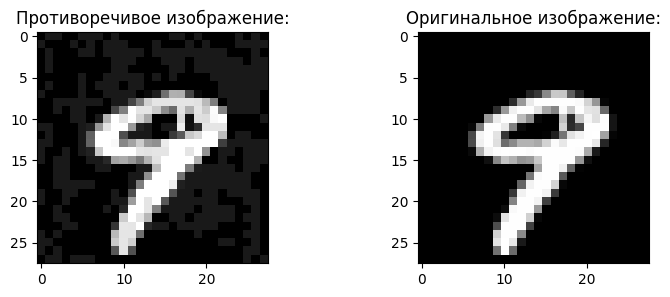

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 2)
plt.title("Оригинальное изображение:")
plt.imshow(test_images[9], cmap="gray")
plt.subplot(1, 2, 1)
plt.title("Противоречивое изображение:")
plt.imshow(adversarial_example[9].reshape(28, 28), cmap="gray")
plt.show()

In [37]:
# Оценка полносвязной модели на противоречивых примерах:
adversarial_loss1, adversarial_acc1 = model1.evaluate(adversarial_example.reshape(10000, 28, 28),
test_labels)
# Оценка свёрточной модели на противоречивых примерах:
adversarial_loss2, adversarial_acc2 = model2.evaluate(adversarial_example.reshape(10000, 28, 28),
test_labels)
print(f'Точность полносвязной модели: {adversarial_acc1}')
print(f'Точность свёрточной модели: {adversarial_acc2}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0702 - loss: 6.5685
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9564 - loss: 0.1443
Точность полносвязной модели: 0.09319999814033508
Точность свёрточной модели: 0.9635999798774719


In [38]:
# Создание противоречивых изображений для свёрточной модели:
adversarial_example1 = generate_adversarial_example(model2, test_images, test_labels, epsilon)

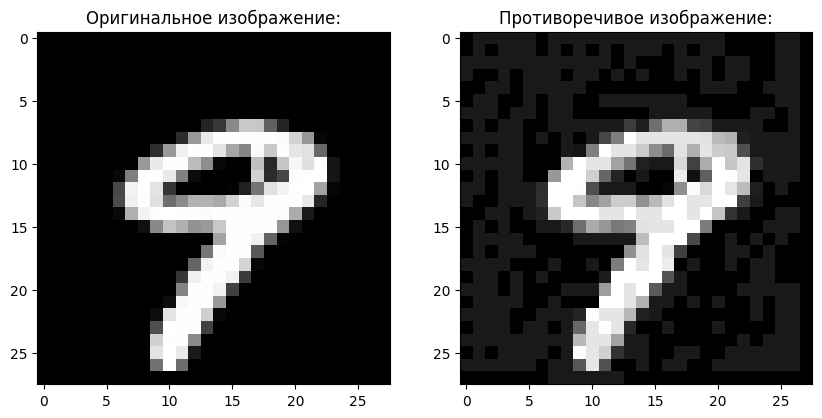

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Оригинальное изображение:")
plt.imshow(test_images[9], cmap="gray")
plt.subplot(1, 2, 2)
plt.title("Противоречивое изображение:")
plt.imshow(adversarial_example1[9].reshape(28, 28), cmap="gray")
plt.show()

In [40]:
# Оценка полносвязной модели на противоречивых примерах:
adversarial_loss3, adversarial_acc3 = model1.evaluate(adversarial_example1.reshape(10000, 28, 28),
test_labels)
# Оценка свёрточной модели на противоречивых примерах:
adversarial_loss4, adversarial_acc4 = model2.evaluate(adversarial_example1.reshape(10000, 28, 28),
test_labels)
print(f'Точность полносвязной модели: {adversarial_acc3}')
print(f'Точность свёрточной модели: {adversarial_acc4}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8358 - loss: 0.4492
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6652 - loss: 1.3165
Точность полносвязной модели: 0.8654999732971191
Точность свёрточной модели: 0.6887000203132629
